In [1]:
import cv2, sys
from matplotlib import pyplot as plt
import numpy as np

image = cv2.imread('Bart.png')
image_gray = cv2.imread('Bart.png', cv2.IMREAD_GRAYSCALE)

# cv2.split(image) : 이미지의 BGR-> 채널 분리, 각 채널의 순서에 맞게 변수에 대입되는 메서드
b,g,r = cv2.split(image)
# cv2.merge([],(채널1, 채널2, 채널3)) : 채널을 변경을 했다면 다시 합치거나 순서를 변경해서 병합을 할 수 있습니다.
image2= cv2.merge([r,g,b])

#plt.imshow(image2)
#plt.xticks([])
#plt.yticks([])
#plt.show()
#cv2.imshow('image', image)
#cv2.imshow('image_gray', image_gray)
#cv2.GaussianBlur(이미지, 커널의 사이즈(NxN), sigmaX=0) : 모든 픽셀에 똑같은 가중치가 들어가 있다면 중심에 있는 픽셀에 높은 가중치를 부여합니다.
# 커널의 크기에 맞춰서 시그마를 계산해서 사용하게 됩니다.
blur = cv2.GaussianBlur(image_gray, ksize=(3,3), sigmaX=0)
# 함수를 사용한 이진화, 전체 이미지에 하나의 임계값을 적용합니다.
# 임계값 ? 애매한값들 이분법을 통해서 확실히 분류를 할 기준을 임계값, 분류 임계값, 결정 임계값
# cv2.threshold(이미지, 임계값, 최대값, method)
# cv2.THRESH_BINARY : 픽셀값이 임계값보다 클 경우 최대값으로 하고 픽셀값이 임계값보다 작을 경우 0(검은색)
# cv2.THRESH_BINARY_INV : THRESH_BINARY의 반전된 값을 반환합니다. 255(하얀색)
ret, thresh1 = cv2.threshold(blur, 127, 255, cv2.THRESH_BINARY)

# cv2.Canny(이미지(grayScale), min(0), max(255)) : 가우시안 블러를 통해서 이미지의 노이즈를 줄여줬다면  외각선을 따주는 역할을 합니다.
edge = cv2.Canny(blur, 10, 250)
#cv2.imshow('Edge', edge)

# cv2.getStructuringElement(메서드, 커널크기nXn) : 직사각형 모양의 N X N크기의 커널 매트릭스를 생성합니다.
# cv2.MORPH_RECT : 사각형 모양의 매트릭스를 생성
# cv2.MORPH_ELLIPSE : 타원모양의 매트릭스를 생성
# cv2.MORPH_CROSS : 십자 모양의 매트릭스를 생성
kernal = cv2.getStructuringElement(cv2.MORPH_RECT, (7,7))
# cv2.morphologyEx(이미지, 메서드, 커널) : 이미지 변형기능 메서드
# 인자 메서드
# cv2.MORPH_OPEN : 열어주는 역할
# cv2.MORPH_CLOSE : 닫아주는 역할
# cv2.MORPH_GRADIENT : erosion, dilation 이미지의 차이를 나타내는 역할
# cv2.MORPH_TOPHAT : 원본 이미지와 open한 이미지의 차이점을 나타내는 역할
# cv2.MORPH_BLACKHAT : close 이미지와 원본 이미지의 차이점을 나타내는 역할
closed = cv2.morphologyEx(edge, cv2.MORPH_CLOSE, kernal)
#cv2.imshow('closed', closed)
# cv2.findContours(image, mode, method) : 이미지의 컨투어 정보, 컨투어의 상하구조 정보를 출력
# 조건 : 흑백이미지, 이진화된 이미지만 적용할 수 있습니다.
# 컨투어 ? 동일한 색 또는 동일한 픽셀값을 가지고 있는 영역 경계선의 정보
# mode <상하구조 : hierachy)
# 1) cv2.RETR_EXTERNAL : 컨투어 라인중 가장 밖같쪽의 라인을 찾습니다
# 2) cv2.RETR_LIST : 모든 컨투어 라인을 찾지만, 상하구조관계를 구성하지 않습니다.
# 3) cv2.RETR_CCOMP : 모든 컨투어라인을 찾고 상하구조 2단계를 구성
# 4) cv2.RETR_TREE : 모든 컨투어 라인을 찾고 모든 상하구조를 구성
# method 
# 1) cv2.CHAIN_APPROX_NONE : 모든 컨투어 포인트를 반환
# 2) cv2.CHAIN_APPROX_SIMPLE :컨투어 라인을 그릴 수 있는 포인트만 반환
# 3) cv2.CHAIN_APPROX_TC89_L1 :  Teh_Chin 연결 근사 알고리즘 L1 버전을 적용해서 컨투어 포인트 줄임
# 4) cv2.CHAIN_APPROX_TC89_KCOS : Teh_Chin 연결 근사 알고리즘 KCOS 버전을 적용해서 컨투어 포인트 줄임
contours, _ = cv2.findContours(closed.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
total = 0
# drawContours(이미지, 컨투어, 컨투어 라인 번호, 색상, 컨투어 라인의 두께)
# Contours Line : contours는 리스트 형식으로 되어져 있습니다. 몇번째 인덱스를 선택할지 알려줌, -1 : 전체
contours_image = cv2.drawContours(image, contours, -1, (0, 255, 0), 3)
cv2.imshow('contours_image', contours_image)

cv2.waitKey(0)
cv2.destroyAllWindows()

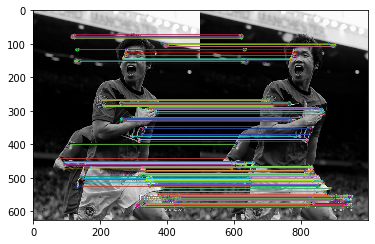

In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

class compareImage:
    def __init__(self):
        pass
    
    def readimage(self, filepath):
        img = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
        #cv2.namedWindow("root", cv2.WINDOW_NORMAL) # 윈도우창 생성
        #cv2.imshow("root", img)
        #cv2.waitKey(3000)
        #cv2.destroyAllWindows() # 윈도창 종료
        return img
    
    def DifferentImage(self, img1, img2):
        orb = cv2.ORB_create()
        
        # ORB = 이미지의 특징점을 매칭을 해주기 위해서 사용하는 메서드
        # detectAndCompute(keypoint, Mask) : kp1, des1 가지고 있는 이미지를 비교할 수 있도록 객체 생성
        kp1, des1 = orb.detectAndCompute(img1, None)
        kp2, des2 = orb.detectAndCompute(img2, None)
        
        # 매칭을 할 수 있도록 합니다.
        # BFMathcer(normtype : 거리 측정방식, bool crossCheck  false) # 
        # True라면 A라는 이미지와 B라는 이미지 모든 특징점을 비교하고 유사한것들 찾으라고 명령을 내리는 옵션
        bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
        
        #match, knnMatch : 
        # match 가장 좋은 매칭 결과를 반환합니다.
        # knnMatch  : 사용자가 지정한 k개의 가장 좋은 매칭 결과를 반환
        matches = bf.match(des1, des2)
        
        # lambda 인자 : 표현식
        matches = sorted(matches, key = lambda x:x.distance)
        
        bf = cv2.BFMatcher()
        matches = bf.knnMatch(des1, des2, k=2)
        
        fit = []
        for m,n in matches:
            if m.distance < .8 * n.distance:
                fit.append([m])
                # drawMatchesKnn : 2 개의 이미지 간의 동일한 특징점을 선으로 연결시켜 줍니다.
        knn_image = cv2.drawMatchesKnn(img1, kp1, img2, kp2, fit, None, flags=2)
        plt.imshow(knn_image)
        plt.show()
    
    def start(self):
        # 이미지 경로 설정
        filepath1 = "./Park1.jpg"
        filepath2 = "./Park1.jpg"
        
        # 이미지 객체 불러오기
        img1 = self.readimage(filepath1)
        img2 = self.readimage(filepath2)
        
        self.DifferentImage(img1, img2)
if __name__ == "__main__":
    cImg = compareImage()
    cImg.start()
    